In [49]:

import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

from astropy.table import Table

%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [5]:
dd_path = '/Users/tliaudat/Documents/PhD/CFIS/WL_hack_sessions/data/catalogue_CFIS_W3/final_cat.npy'

dd = np.load(dd_path)


# 1st session

In [6]:
dd.dtype.names

('XWIN_WORLD',
 'YWIN_WORLD',
 'TILE_ID',
 'FLAGS',
 'IMAFLAGS_ISO',
 'NGMIX_MCAL_FLAGS',
 'NGMIX_ELL_PSFo_NOSHEAR',
 'GALSIM_PSF_ELL_ORIGINAL_PSF',
 'SPREAD_CLASS',
 'SPREAD_MODEL',
 'SPREADERR_MODEL',
 'N_EPOCH',
 'NGMIX_N_EPOCH',
 'NGMIX_ELL_1M',
 'NGMIX_ELL_1P',
 'NGMIX_ELL_2M',
 'NGMIX_ELL_2P',
 'NGMIX_ELL_NOSHEAR',
 'NGMIX_ELL_ERR_NOSHEAR',
 'NGMIX_FLAGS_1M',
 'NGMIX_FLAGS_1P',
 'NGMIX_FLAGS_2M',
 'NGMIX_FLAGS_2P',
 'NGMIX_FLAGS_NOSHEAR',
 'NGMIX_T_1M',
 'NGMIX_T_1P',
 'NGMIX_T_2M',
 'NGMIX_T_2P',
 'NGMIX_T_NOSHEAR',
 'NGMIX_T_ERR_1M',
 'NGMIX_T_ERR_1P',
 'NGMIX_T_ERR_2M',
 'NGMIX_T_ERR_2P',
 'NGMIX_T_ERR_NOSHEAR',
 'NGMIX_Tpsf_1M',
 'NGMIX_Tpsf_1P',
 'NGMIX_Tpsf_2M',
 'NGMIX_Tpsf_2P',
 'NGMIX_Tpsf_NOSHEAR',
 'NGMIX_FLUX_1M',
 'NGMIX_FLUX_1P',
 'NGMIX_FLUX_2M',
 'NGMIX_FLUX_2P',
 'NGMIX_FLUX_NOSHEAR',
 'NGMIX_FLUX_ERR_1M',
 'NGMIX_FLUX_ERR_1P',
 'NGMIX_FLUX_ERR_2M',
 'NGMIX_FLUX_ERR_2P',
 'NGMIX_FLUX_ERR_NOSHEAR',
 'GALSIM_GAL_ELL_1M',
 'GALSIM_GAL_ELL_1P',
 'GALSIM_GAL_ELL_2M',


In [7]:
len(dd)

5367032

In [8]:
# Building a mask
# Mask to avoid repeated objects due to tile overlap (FLAG_TILING)
# Other flagged objects FLAGS & IMAFLAGS_ISO
mask = (dd['FLAG_TILING'] == 1) & (dd['FLAGS'] == 0) & (dd['IMAFLAGS_ISO'] == 0) & \
        (dd['NGMIX_FLAGS_NOSHEAR'] == 0) &  (dd['NGMIX_MCAL_FLAGS'] == 0)


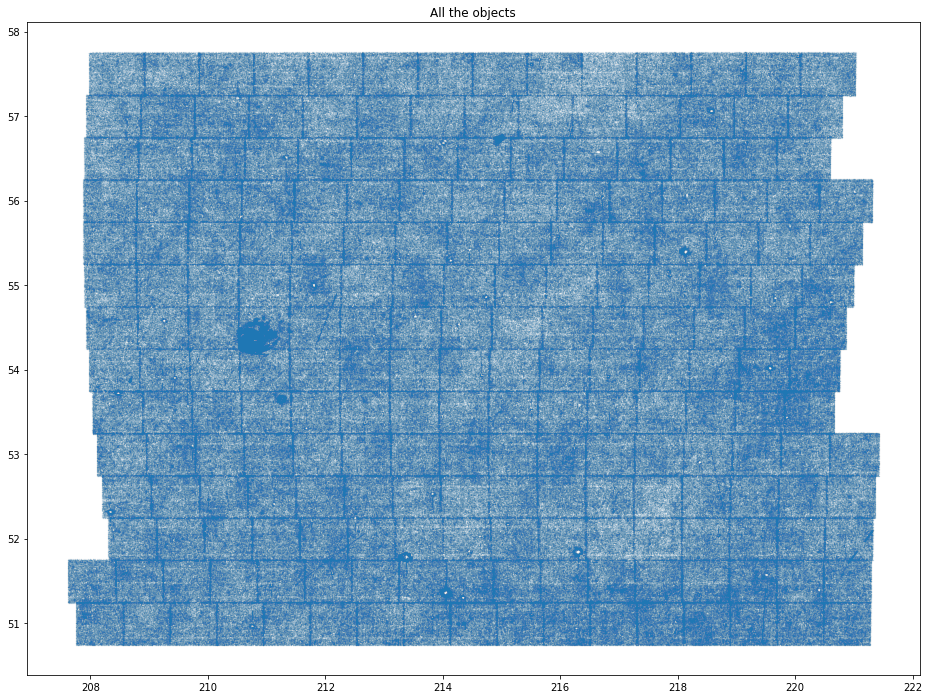

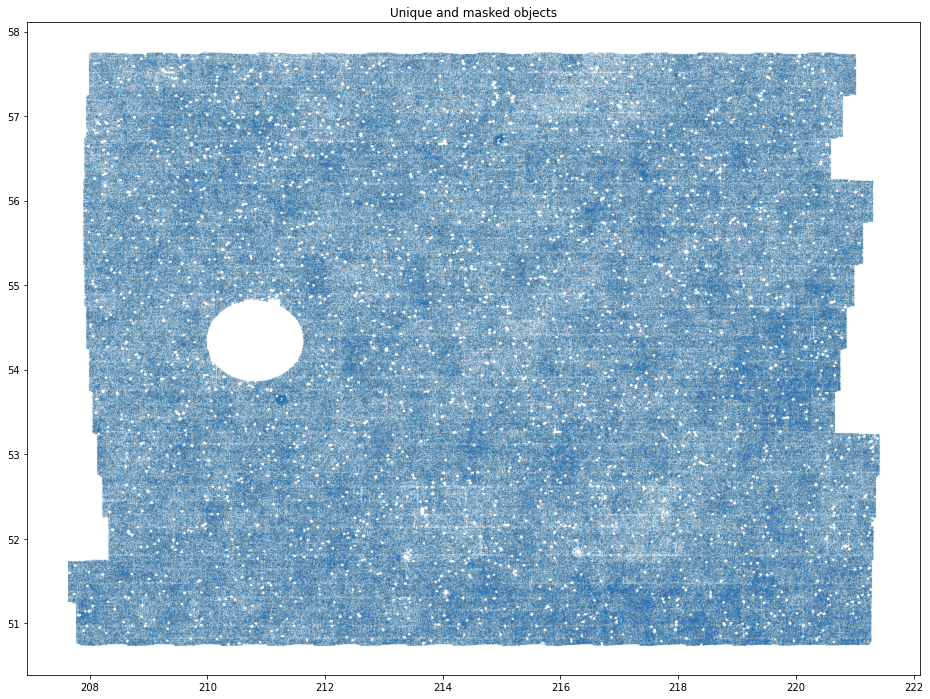

In [9]:
plt.figure(figsize=(16,12))
plt.plot(dd['XWIN_WORLD'], dd['YWIN_WORLD'], '.', markersize=0.05)
plt.title('All the objects')
plt.show()

plt.figure(figsize=(16,12))
plt.plot(dd['XWIN_WORLD'][mask], dd['YWIN_WORLD'][mask], '.', markersize=0.05)
plt.title('Unique and masked objects')
plt.show()


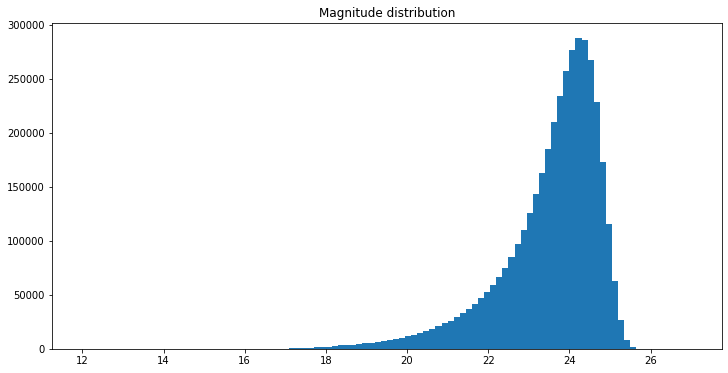

In [10]:
plt.figure(figsize=(12,6))
_ = plt.hist(dd['MAG_AUTO'][mask], range=(12, 27), bins=100)
plt.title('Magnitude distribution')
plt.show()


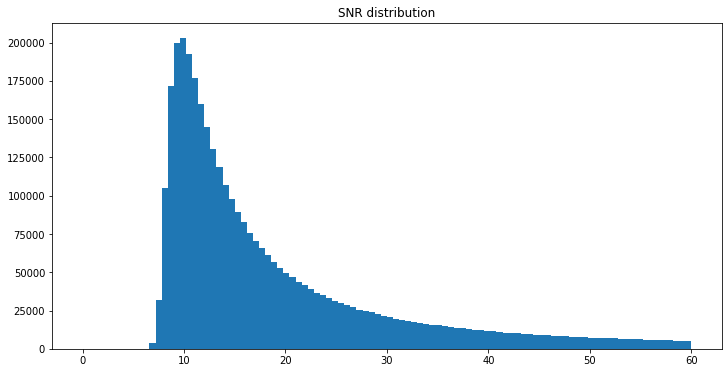

In [11]:

plt.figure(figsize=(12,6))
_ = plt.hist(dd['SNR_WIN'][mask], range=(0, 60), bins=100)
plt.title('SNR distribution')
plt.show()


In [12]:
print(np.mean(dd['NGMIX_ELL_NOSHEAR'][:,0][mask]),
      np.mean(dd['NGMIX_ELL_NOSHEAR'][:,1][mask]))

-0.0005714872916208202 0.0004328348554080995


In [13]:
print(min(dd['NGMIX_ELL_NOSHEAR'][:,0][mask]),
      max(dd['NGMIX_ELL_NOSHEAR'][:,0][mask]))

-0.9999976688054742 0.9999820295117724


In [14]:
np.sum(dd['NGMIX_FLAGS_NOSHEAR'] != 0)

163877

# 2nd session


- 0: stars
- 1: galaxies 
- 2: artefacts


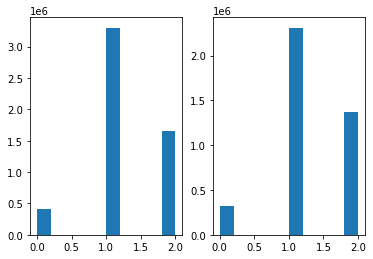

In [16]:

subplot(121)
_ = hist(dd['SPREAD_CLASS'])

subplot(122)
_ = hist(dd['SPREAD_CLASS'][mask])


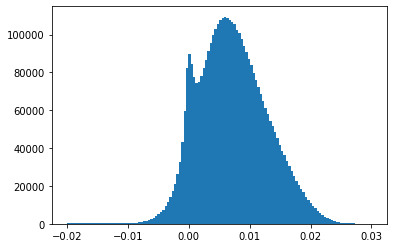

In [19]:

_ = hist(dd['SPREAD_MODEL'][mask], range=[-0.02, 0.03], bins=128)


### Documentation about the `SPREAD_MODEL` parameter

`https://sextractor.readthedocs.io/en/latest/Model.html?highlight=spread#model-based-star-galaxy-separation-spread-model`


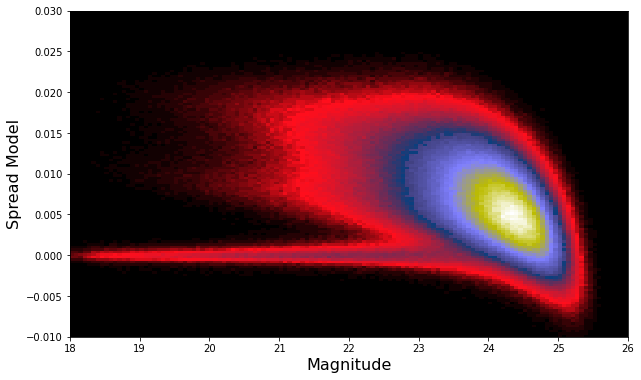

In [34]:


figure(figsize=(10,6))
_ = hist2d(dd['MAG_AUTO'][mask], dd['SPREAD_MODEL'][mask], range=[[18,26] , [-0.01,0.03]],
           bins=128, cmap='gist_stern')
_ = xlabel('Magnitude', size=16)
_ = ylabel('Spread Model', size=16)




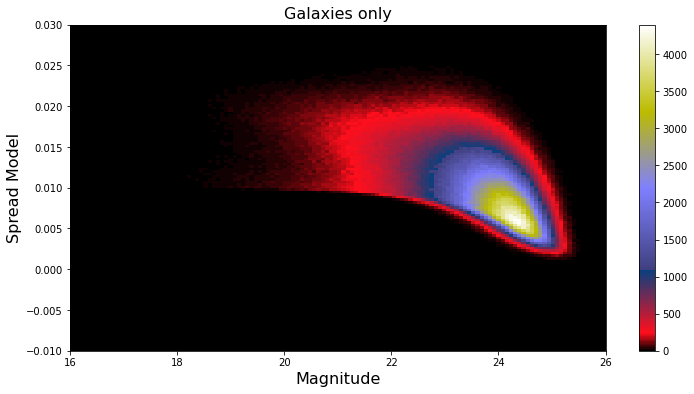

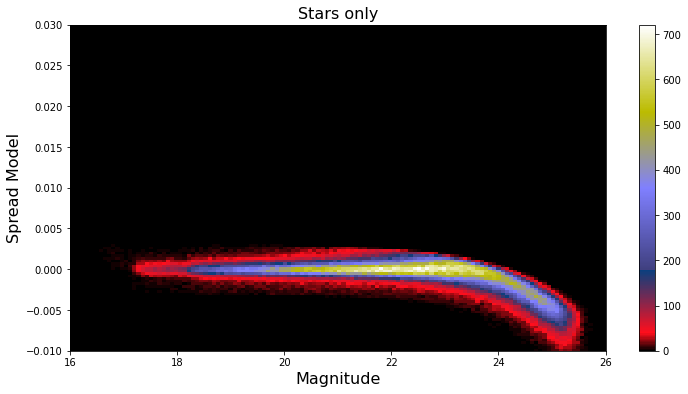

In [42]:

mask_galaxies = mask & (dd['SPREAD_CLASS']==1)

figure(figsize=(12,6))
_ = hist2d(dd['MAG_AUTO'][mask_galaxies], dd['SPREAD_MODEL'][mask_galaxies], range=[[16,26] , 
            [-0.01,0.03]], bins=128, cmap='gist_stern')
colorbar()
_ = xlabel('Magnitude', size=16)
_ = ylabel('Spread Model', size=16)
_ = plt.title('Galaxies only', size=16)


mask_stars = mask & (dd['SPREAD_CLASS']==0)

figure(figsize=(12,6))
_ = hist2d(dd['MAG_AUTO'][mask_stars], dd['SPREAD_MODEL'][mask_stars], range=[[16,26] , 
            [-0.01,0.03]], bins=128, cmap='gist_stern')
colorbar()
_ = xlabel('Magnitude', size=16)
_ = ylabel('Spread Model', size=16)
_ = plt.title('Stars only', size=16)



### Empirical rule for the selection of galaxies

- This is not used to select stars!
- The stars are selected on the size-magnitude plane


In [44]:

sm_classif = dd['SPREAD_MODEL'] + 2 * dd['SPREADERR_MODEL']

# Rule: sm_classif > 0.0035
selected_gals = sm_classif > 0.0035


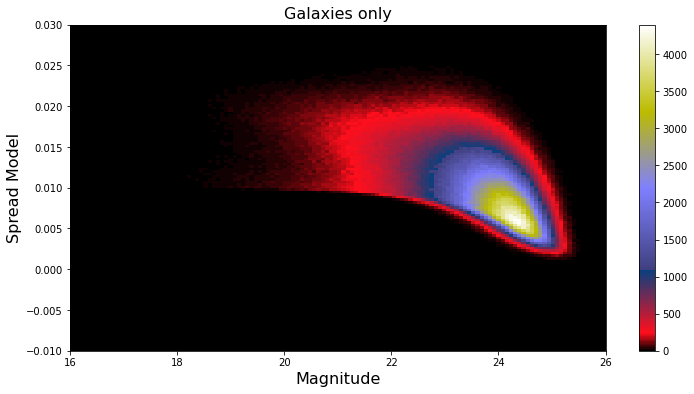

In [43]:
mask_galaxies_selec = mask & (dd['SPREAD_CLASS']==1) & (selected_gals)

figure(figsize=(12,6))
_ = hist2d(dd['MAG_AUTO'][mask_galaxies_selec], dd['SPREAD_MODEL'][mask_galaxies_selec], range=[[16,26] , 
            [-0.01,0.03]], bins=128, cmap='gist_stern')
colorbar()
_ = xlabel('Magnitude', size=16)
_ = ylabel('Spread Model', size=16)
_ = plt.title('Galaxies only', size=16)




## Star catalog for W3

- Only validation stars (represents teh 20% of the star sample)
- This catalog contains repeated objects (2 or 3 times)



In [51]:
# Load star catalog

star_path = '/Users/tliaudat/Documents/PhD/CFIS/WL_hack_sessions/data/catalogue_CFIS_W3/output/run_sp_MsPl/mccd_merge_starcat_runner/output/full_starcat-0000000.fits'



In [61]:

Table.read(star_path, hdu=2)


X,Y,RA,DEC,E1_PSF_HSM,E2_PSF_HSM,SIGMA_PSF_HSM,E1_STAR_HSM,E2_STAR_HSM,SIGMA_STAR_HSM,FLAG_PSF_HSM,FLAG_STAR_HSM,CCD_NB
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
-5655.071395124369,5279.214739098517,217.82663582087287,54.77844259649623,0.06664546013000466,-0.049135098381858304,1.5797637701034546,0.060129399125684754,-0.034367393753435414,1.5556344985961914,0.0,0.0,0.0
-5343.009734439577,5704.926691200415,217.7987110599747,54.80043341126079,0.05792693309369971,-0.04129280830916392,1.5584254264831543,0.08364215624866449,-0.037897859360399966,1.5426160097122192,0.0,0.0,0.0
-5678.412263601143,9409.454217525388,217.82782104440528,54.99042946287721,0.04776511477621796,-0.0836767702194216,1.6429502964019775,0.003825565889885061,-0.05474192806394717,1.59054434299469,0.0,0.0,0.0
-6025.913945265132,7109.661388612281,217.8593681367769,54.87222335981904,0.058715833563876,-0.04180727255062146,1.5368461608886719,0.0748434025323804,-0.05335470965185339,1.5682880878448486,0.0,0.0,0.0
-5496.535703385833,7689.441284959215,217.81193326280484,54.902227985021945,0.06050961556375801,-0.0506556021889481,1.5530987977981567,0.048600848111630075,-0.02515582568472467,1.5489903688430786,0.0,0.0,0.0
-5667.527799305658,5639.927007733217,217.8276678998636,54.79695198096755,0.06186273096054109,-0.04461564301400481,1.564837098121643,0.06751784269856966,-0.03727211997310413,1.519326090812683,0.0,0.0,0.0
-4862.05607217563,7799.660170079584,217.75516888878155,54.90815543920137,0.06587982079167724,-0.053426953095139645,1.5588291883468628,0.05576049660420453,-0.04439083898283978,1.5419180393218994,0.0,0.0,0.0
-4860.3028857939435,6688.294107323913,217.7553559760284,54.85111160455157,0.054721920209811314,-0.036955862472197606,1.5364415645599365,0.060815959990342984,-0.03994012522109251,1.5554977655410767,0.0,0.0,1.0
-5846.117157971118,8876.389931656708,217.8429543299225,54.96299104565496,0.03561304503848562,-0.059874500100288754,1.5912493467330933,0.04172981776170023,-0.042188382093558664,1.5612646341323853,0.0,0.0,1.0


In [58]:

starcat = fits.open(star_path)
starcat[2].columns


ColDefs(
    name = 'X'; format = '1D'
    name = 'Y'; format = '1D'
    name = 'RA'; format = '1D'
    name = 'DEC'; format = '1D'
    name = 'E1_PSF_HSM'; format = '1D'
    name = 'E2_PSF_HSM'; format = '1D'
    name = 'SIGMA_PSF_HSM'; format = '1D'
    name = 'E1_STAR_HSM'; format = '1D'
    name = 'E2_STAR_HSM'; format = '1D'
    name = 'SIGMA_STAR_HSM'; format = '1D'
    name = 'FLAG_PSF_HSM'; format = '1D'
    name = 'FLAG_STAR_HSM'; format = '1D'
    name = 'CCD_NB'; format = '1D'
)

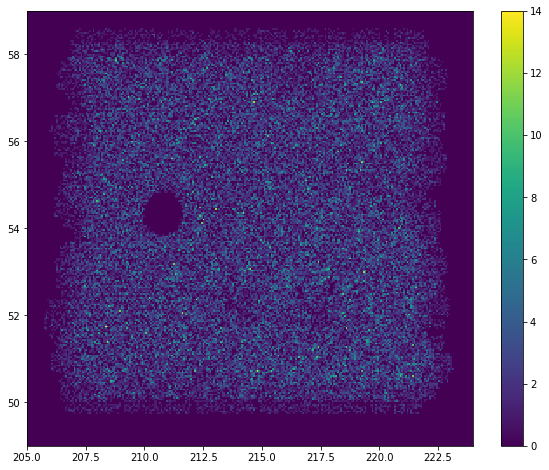

In [62]:

figure(figsize=(10,8))
_ = hist2d(starcat[2].data['RA'], starcat[2].data['DEC'],
           range=[[205, 224] , [49,59]], bins=256)#, cmap='gist_stern')
colorbar()


